<h1 align='center'>Titanic Survivor Prediction</h1>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('titanic.csv')                                                                     ## lOADING DATA INTO DATAFRAME.
print('\nWe have {} number of Rows and number of columns {}\n'.format(df.shape[0],df.shape[1]))
df.head()


We have 891 number of Rows and number of columns 12



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()                                                                                     ## CHECKING FOR NULL OR MISSING VALUES.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.loc[df['Age'].isnull()].index                                                                      ## GETTING INDEX NUMBER OF WHERE AGE IS MISSING

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [5]:
df.drop(index = df.loc[df['Age'].isnull()].index, inplace=True)                                      ## DROPPING RECORDS WHERE AGE IS MISSING SINCE WE DON'T HAVE ANY DPENDENCIES TO PREDICT AGE

In [6]:
print('\nNumber of Duplicated Records :',df.duplicated().sum())


Number of Duplicated Records : 0


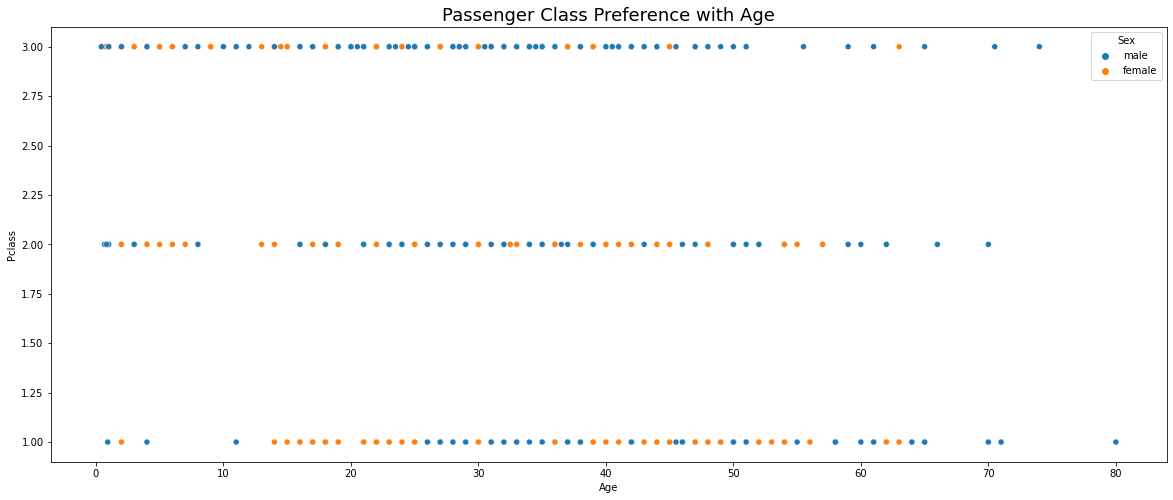

In [24]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=df, y='Pclass',x='Age',hue='Sex')
plt.title('Passenger Class Preference with Age',size=18)
plt.show()

<h4>Train Test Split</h4>

In [25]:
import sklearn
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df[['Pclass','Age']],df["Survived"], test_size = 0.1, train_size=0.9)

<h3 align = 'center'>Logistic Regression</h3>

In [33]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()                                                                       ## Calling and assigning Logistic Regression model to lr variable

In [36]:
lr_trained = lr.fit(X_train, y_train)                                                           ## Training Our Model

In [40]:
y_pred = lr_trained.predict(X_test)                                                             ## Predicting Results

<b><br>Importing Important Library <br></b>

In [49]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

<b><br>Confusion Matrix</b>

In [50]:
confusion_matrix(y_test, y_pred)

array([[37,  6],
       [13, 16]], dtype=int64)

<b><br>Precision and Recall</b>

In [53]:
from sklearn.metrics import precision_score, recall_score

In [54]:
precision = precision_score(y_test, y_pred)

In [55]:
recall =  recall_score(y_test, y_pred)

<b> F1 Score : Mannul</b>

In [57]:
f1 = 2 * (precision * recall) / (precision + recall)

In [58]:
f1

0.6274509803921569

<b> F1 Score : Auto</b>

In [59]:
f1_score(y_test, y_pred)

0.6274509803921569

<b> Complete Report </b>

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.86      0.80        43
           1       0.73      0.55      0.63        29

    accuracy                           0.74        72
   macro avg       0.73      0.71      0.71        72
weighted avg       0.73      0.74      0.73        72

